In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset
Assessment_2 = pd.read_csv("assessment_twooo.csv")

C:\Users\akinw\AppData\Local\Temp\ipykernel_13080\1898831819.py:14: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254

# Examining the data structure and summary statistics
Assessment_2.head()

In [2]:
Assessment_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Columns: 2482 entries, X to X.2234
dtypes: object(2482)
memory usage: 7.6+ MB


In [3]:
# Converting the first row to column names
Assessment_2.columns = Assessment_2.iloc[0]
Assessment_2 = Assessment_2[1:].reset_index(drop=True)

In [4]:
# Checking for missing values
print(Assessment_2.isna().sum())

0
XLAT      13
XLONG     10
TSK       16
PSFC      12
"U10"     12
          ..
RAINC     13
RAINNC     5
SNOW      11
TSLB      12
SMOIS     12
Length: 2482, dtype: int64


In [5]:
# Converting columns to numeric (excluding the first column if it contains strings)
Assessment_2 = Assessment_2.apply(pd.to_numeric, errors='ignore')

In [6]:
# Checking for missing values and removing rows with missing XLAT and XLONG
Assessment_2 = Assessment_2.dropna(subset=['XLAT', 'XLONG'])

In [7]:
Assessment_2

,XLAT,XLONG,TSK,PSFC,"""U10""","""V10""","""Q2""",RAINC,RAINNC,SNOW,...,TSK,PSFC,"""U10""","""V10""","""Q2""",RAINC,RAINNC,SNOW,TSLB,SMOIS
0,54.217,-2.583,270.0,98263.0,-0.8,-2.4,0.00291,0.0,0.0,0.0,...,287.8,99082.0,-3.3,1.2,0.01074,2.1,0.0,0.0,291.3,0.2558
1,54.355,-2.579,270.0,97568.0,0.4,-2.0,0.00302,0.0,0.0,0.0,...,286.8,98433.0,-2.4,1.3,0.01023,3.6,0.1,0.0,291.1,0.2716
2,54.493,-2.575,269.9,97394.0,1.7,NaN,0.00298,0.0,0.0,0.0,...,286.4,98277.0,-2.0,1.5,0.01006,4.2,0.1,0.0,291.1,0.2777
3,54.631,-2.570,268.9,97209.0,1.1,-1.4,0.00279,0.0,0.0,0.0,...,290.0,98113.0,-1.7,0.9,0.01154,3.4,0.2,0.0,291.3,NaN
4,54.768,-2.566,270.0,96757.0,0.5,-1.0,0.00291,0.0,0.0,0.0,...,286.1,97697.0,-1.3,0.9,0.01021,NaN,0.2,0.0,291.6,0.2628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,54.337,-1.395,269.8,99677.0,2.5,-2.4,0.00295,0.0,0.0,0.0,...,286.2,100631.0,-2.7,2.2,0.00974,0.0,0.0,0.0,291.5,0.2409
397,54.475,-1.387,270.4,99921.0,2.3,NaN,0.00307,0.0,0.0,0.0,...,286.6,100874.0,-2.1,2.4,0.00991,1.1,0.0,0.0,291.9,0.2511
398,54.613,-1.380,272.3,100009.0,2.8,-2.4,0.00327,0.0,0.0,0.0,...,286.5,100981.0,NaN,1.3,0.00989,0.0,0.1,0.0,292.5,0.2523
399,54.751,-1.372,272.0,99892.0,3.2,-1.9,0.00330,0.0,0.0,0.0,...,287.5,100895.0,-2.6,0.6,0.00936,0.0,0.2,0.0,291.5,0.2615


In [8]:
# Interpolating missing values
Assessment_2.interpolate(method='linear', axis=0, inplace=True)

In [9]:
Assessment_2

,XLAT,XLONG,TSK,PSFC,"""U10""","""V10""","""Q2""",RAINC,RAINNC,SNOW,...,TSK,PSFC,"""U10""","""V10""","""Q2""",RAINC,RAINNC,SNOW,TSLB,SMOIS
0,54.217,-2.583,270.0,98263.0,-0.8,-2.4,0.00291,0.0,0.0,0.0,...,287.8,99082.0,-3.30,1.2,0.01074,2.10,0.0,0.0,291.3,0.25580
1,54.355,-2.579,270.0,97568.0,0.4,-2.0,0.00302,0.0,0.0,0.0,...,286.8,98433.0,-2.40,1.3,0.01023,3.60,0.1,0.0,291.1,0.27160
2,54.493,-2.575,269.9,97394.0,1.7,-1.7,0.00298,0.0,0.0,0.0,...,286.4,98277.0,-2.00,1.5,0.01006,4.20,0.1,0.0,291.1,0.27770
3,54.631,-2.570,268.9,97209.0,1.1,-1.4,0.00279,0.0,0.0,0.0,...,290.0,98113.0,-1.70,0.9,0.01154,3.40,0.2,0.0,291.3,0.27025
4,54.768,-2.566,270.0,96757.0,0.5,-1.0,0.00291,0.0,0.0,0.0,...,286.1,97697.0,-1.30,0.9,0.01021,3.55,0.2,0.0,291.6,0.26280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,54.337,-1.395,269.8,99677.0,2.5,-2.4,0.00295,0.0,0.0,0.0,...,286.2,100631.0,-2.70,2.2,0.00974,0.00,0.0,0.0,291.5,0.24090
397,54.475,-1.387,270.4,99921.0,2.3,-2.4,0.00307,0.0,0.0,0.0,...,286.6,100874.0,-2.10,2.4,0.00991,1.10,0.0,0.0,291.9,0.25110
398,54.613,-1.380,272.3,100009.0,2.8,-2.4,0.00327,0.0,0.0,0.0,...,286.5,100981.0,-2.35,1.3,0.00989,0.00,0.1,0.0,292.5,0.25230
399,54.751,-1.372,272.0,99892.0,3.2,-1.9,0.00330,0.0,0.0,0.0,...,287.5,100895.0,-2.60,0.6,0.00936,0.00,0.2,0.0,291.5,0.26150


In [10]:
# Checking for duplicates
print(Assessment_2.duplicated().sum())

0


In [11]:
Assessment_2.isna().sum()

0
XLAT      0
XLONG     0
TSK       0
PSFC      0
"U10"     0
         ..
RAINC     0
RAINNC    0
SNOW      0
TSLB      0
SMOIS     0
Length: 2482, dtype: int64

## Time series

In [22]:
# Loading the second phase dataset
phase2 = pd.read_csv("Phase2.csv")

In [23]:
phase2

,DATE/TIME,TSK
0,01.05.2018.00.00,276.7
1,01.05.2018.03.00,275.6
2,01.05.2018.06.00,277.0
3,01.05.2018.09.00,287.2
4,01.05.2018.12.00,292.9
...,...,...
243,31.05.2018.09.00,293.7
244,31.05.2018.12.00,301.3
245,31.05.2018.15.00,304.9
246,31.05.2018.18.00,299.7


In [24]:
# Converting the DATE.TIME column to datetime format
phase2['DATE/TIME'] = pd.to_datetime(phase2['DATE/TIME'], format='%d.%m.%Y.%H.%M')

In [25]:
phase2_ts = phase2.set_index('DATE/TIME')['TSK']

In [29]:
# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(phase2_ts) * 0.8)
phase2_ts_train = phase2_ts[:train_size]
phase2_ts_test = phase2_ts[train_size:]

In [30]:
phase2_ts_train

DATE/TIME
2018-05-01 00:00:00    276.7
2018-05-01 03:00:00    275.6
2018-05-01 06:00:00    277.0
2018-05-01 09:00:00    287.2
2018-05-01 12:00:00    292.9
                       ...  
2018-05-25 03:00:00    284.9
2018-05-25 06:00:00    285.1
2018-05-25 09:00:00    285.5
2018-05-25 12:00:00    286.7
2018-05-25 15:00:00    292.9
Name: TSK, Length: 198, dtype: float64

In [18]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Fitting Auto-ARIMA Model
from pmdarima import auto_arima

arima_model = auto_arima(phase2_ts_train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
arima_forecast = arima_model.predict(n_periods=len(phase2_ts_test))
arima_rmse = np.sqrt(mean_squared_error(phase2_ts_test, arima_forecast))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1120.046, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2806.707, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1116.109, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1127.471, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1117.206, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1120.808, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1059.478, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1070.613, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1081.567, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1045.105, Time=0

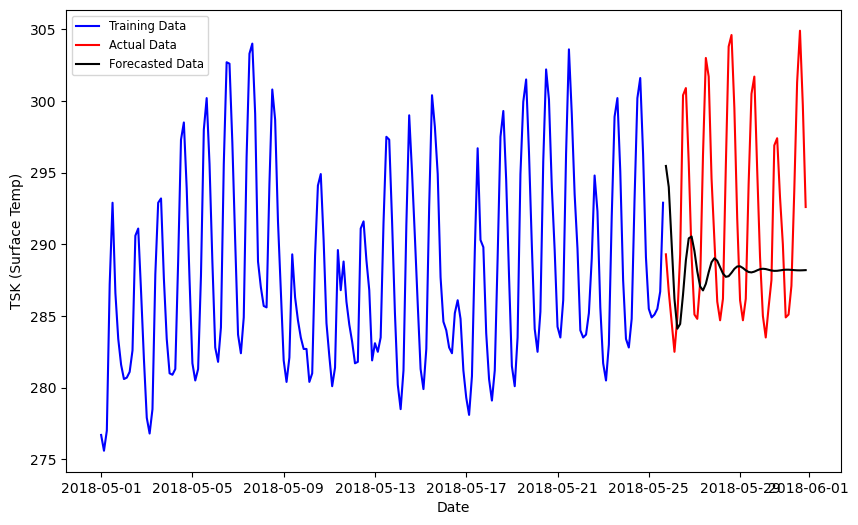

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Plotting
plt.figure(figsize=(10, 6))

# Plot the actual values for training and test data
plt.plot(phase2_ts_train, label='Training Data', color='blue')
plt.plot(phase2_ts_test, label='Actual Data', color='red')

# Plot the forecasted values
plt.plot(arima_forecast, label='Forecasted Data', color='black')

# Labels and legend
plt.xlabel("Date")
plt.ylabel("TSK (Surface Temp)")
plt.legend(loc='upper left', fontsize='small')

plt.show()


In [33]:
# Linear Regression
time_train = np.arange(len(phase2_ts_train)).reshape(-1, 1)
time_test = np.arange(len(phase2_ts_train), len(phase2_ts_train) + len(phase2_ts_test)).reshape(-1, 1)
lr_model = LinearRegression()
lr_model.fit(time_train, phase2_ts_train)
lr_forecast = lr_model.predict(time_test)
lr_rmse = np.sqrt(mean_squared_error(phase2_ts_test, lr_forecast))

In [34]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(time_train, phase2_ts_train)
rf_forecast = rf_model.predict(time_test)
rf_rmse = np.sqrt(mean_squared_error(phase2_ts_test, rf_forecast))

In [35]:
# Support Vector Regression with different kernels
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(time_train, phase2_ts_train)
rbf_forecast = svr_rbf.predict(time_test)
rbf_rmse = np.sqrt(mean_squared_error(phase2_ts_test, rbf_forecast))

svr_poly = SVR(kernel='poly')
svr_poly.fit(time_train, phase2_ts_train)
poly_forecast = svr_poly.predict(time_test)
poly_rmse = np.sqrt(mean_squared_error(phase2_ts_test, poly_forecast))

svr_linear = SVR(kernel='linear')
svr_linear.fit(time_train, phase2_ts_train)
linear_forecast = svr_linear.predict(time_test)
linear_rmse = np.sqrt(mean_squared_error(phase2_ts_test, linear_forecast))

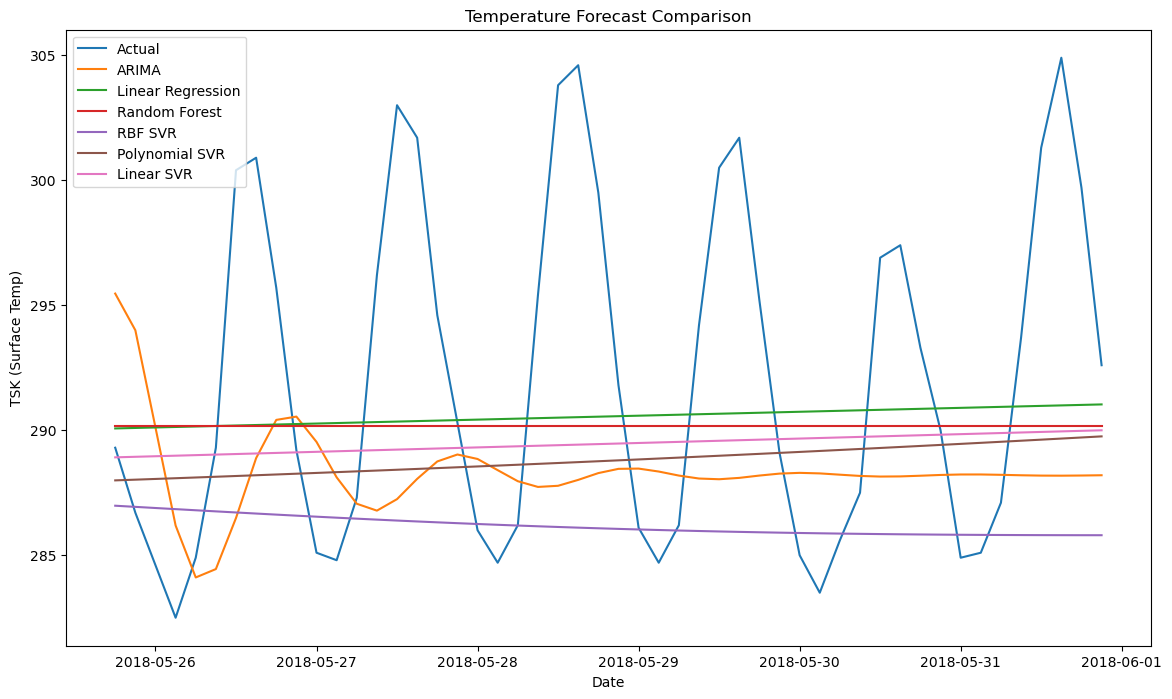

In [36]:
# Plotting the forecasts
plt.figure(figsize=(14, 8))
plt.plot(phase2_ts_test.index, phase2_ts_test, label='Actual')
plt.plot(phase2_ts_test.index, arima_forecast, label='ARIMA')
plt.plot(phase2_ts_test.index, lr_forecast, label='Linear Regression')
plt.plot(phase2_ts_test.index, rf_forecast, label='Random Forest')
plt.plot(phase2_ts_test.index, rbf_forecast, label='RBF SVR')
plt.plot(phase2_ts_test.index, poly_forecast, label='Polynomial SVR')
plt.plot(phase2_ts_test.index, linear_forecast, label='Linear SVR')
plt.legend()
plt.xlabel('Date')
plt.ylabel('TSK (Surface Temp)')
plt.title('Temperature Forecast Comparison')
plt.show()


The best model is Linear Regression with RMSE: 6.848947107726517


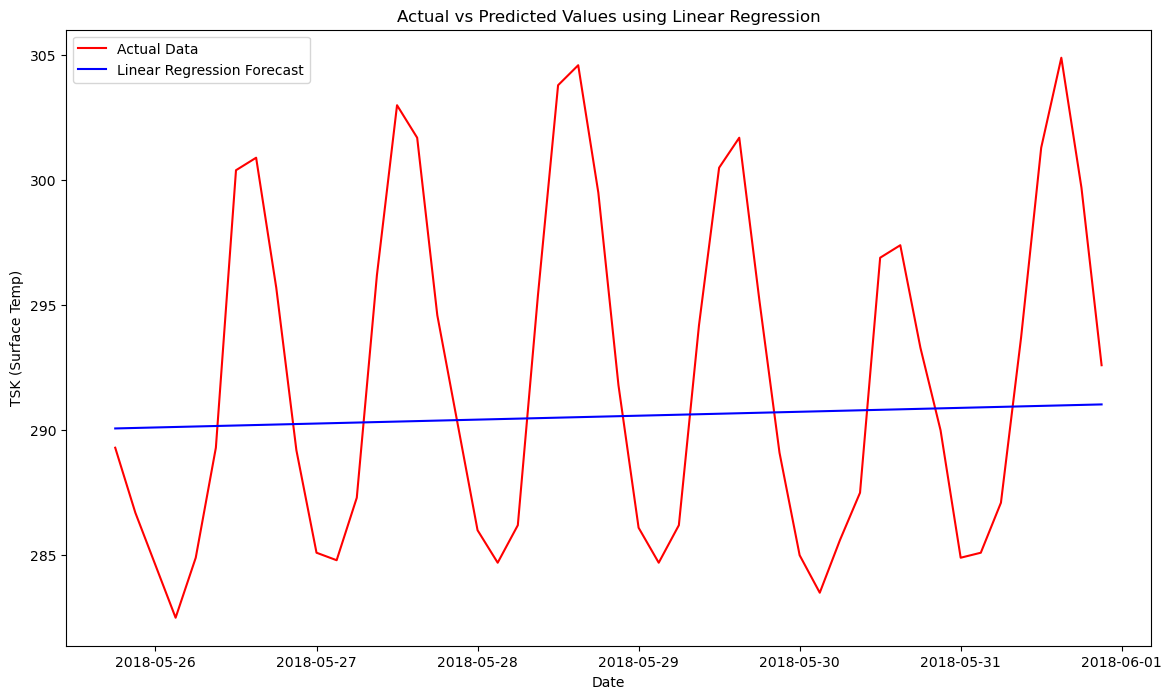

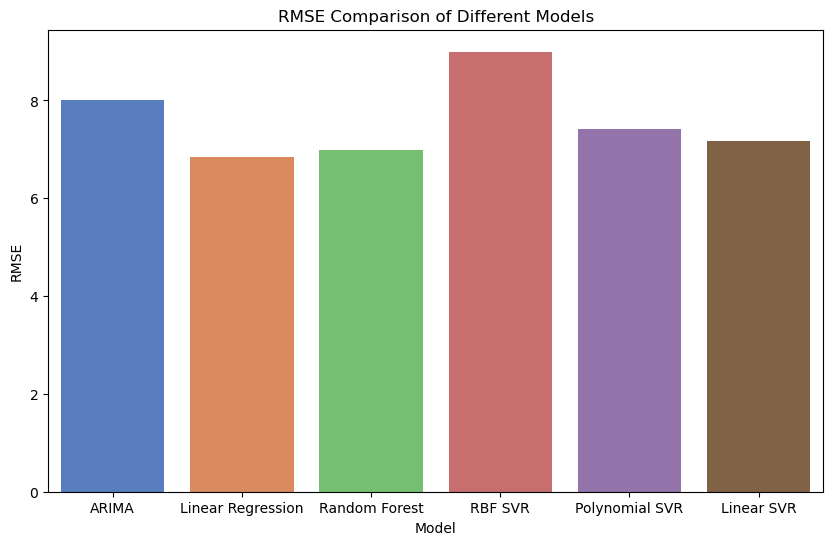

In [40]:
# Identifying the best model based on RMSE
rmse_values = {
    'ARIMA': arima_rmse,
    'Linear Regression': lr_rmse,
    'Random Forest': rf_rmse,
    'RBF SVR': rbf_rmse,
    'Polynomial SVR': poly_rmse,
    'Linear SVR': linear_rmse
}
best_model_name = min(rmse_values, key=rmse_values.get)
best_rmse = rmse_values[best_model_name]

# Print best model and its RMSE
print(f"The best model is {best_model_name} with RMSE: {best_rmse}")

# Get the forecast from the best model
best_forecast = None
if best_model_name == 'ARIMA':
    best_forecast = arima_forecast
elif best_model_name == 'Linear Regression':
    best_forecast = lr_forecast
elif best_model_name == 'Random Forest':
    best_forecast = rf_forecast
elif best_model_name == 'RBF SVR':
    best_forecast = rbf_forecast
elif best_model_name == 'Polynomial SVR':
    best_forecast = poly_forecast
elif best_model_name == 'Linear SVR':
    best_forecast = linear_forecast

# Plotting the actual vs predicted values of the best model
plt.figure(figsize=(14, 8))
plt.plot(phase2_ts_test.index, phase2_ts_test, label='Actual Data', color='red')
plt.plot(phase2_ts_test.index, best_forecast, label=f'{best_model_name} Forecast', color='blue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('TSK (Surface Temp)')
plt.title(f'Actual vs Predicted Values using {best_model_name}')
plt.show()

# Bar chart to compare RMSE values
plt.figure(figsize=(10, 6))
sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()), palette='muted')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Models')
plt.show()

In [41]:
# Print the actual and predicted values for the best model
print("Actual values:", phase2_test)
print(f"Predicted values by {best_model_name}:", best_forecast)

Actual values:               DATE/TIME    TSK
198 2018-05-25 18:00:00  289.3
199 2018-05-25 21:00:00  286.7
200 2018-05-26 00:00:00  284.6
201 2018-05-26 03:00:00  282.5
202 2018-05-26 06:00:00  284.9
203 2018-05-26 09:00:00  289.3
204 2018-05-26 12:00:00  300.4
205 2018-05-26 15:00:00  300.9
206 2018-05-26 18:00:00  295.7
207 2018-05-26 21:00:00  289.2
208 2018-05-27 00:00:00  285.1
209 2018-05-27 03:00:00  284.8
210 2018-05-27 06:00:00  287.3
211 2018-05-27 09:00:00  296.2
212 2018-05-27 12:00:00  303.0
213 2018-05-27 15:00:00  301.7
214 2018-05-27 18:00:00  294.6
215 2018-05-27 21:00:00  290.3
216 2018-05-28 00:00:00  286.0
217 2018-05-28 03:00:00  284.7
218 2018-05-28 06:00:00  286.2
219 2018-05-28 09:00:00  295.4
220 2018-05-28 12:00:00  303.8
221 2018-05-28 15:00:00  304.6
222 2018-05-28 18:00:00  299.5
223 2018-05-28 21:00:00  291.8
224 2018-05-29 00:00:00  286.1
225 2018-05-29 03:00:00  284.7
226 2018-05-29 06:00:00  286.2
227 2018-05-29 09:00:00  294.2
228 2018-05-29 12:00:00 

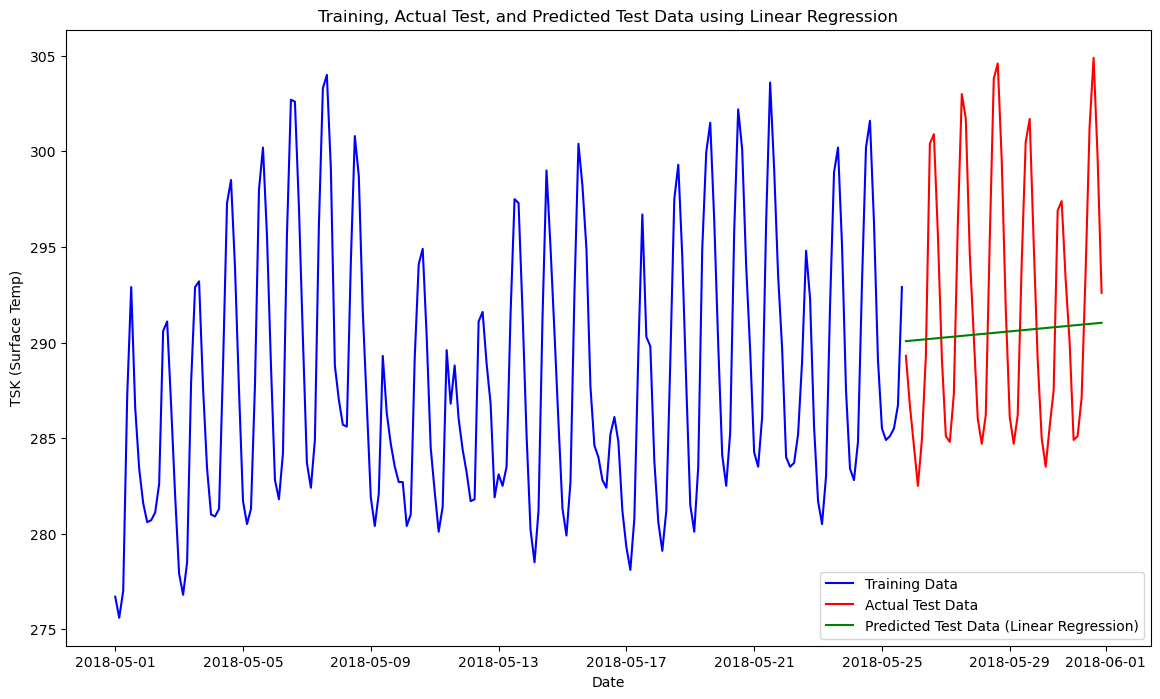

In [44]:
# Plotting the training, actual test data, and predicted test data of the best model
plt.figure(figsize=(14, 8))
plt.plot(phase2_ts_train.index, phase2_ts_train, label='Training Data', color='blue')
plt.plot(phase2_ts_test.index, phase2_ts_test, label='Actual Test Data', color='red')
plt.plot(phase2_ts_test.index, best_forecast, label=f'Predicted Test Data ({best_model_name})', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('TSK (Surface Temp)')
plt.title(f'Training, Actual Test, and Predicted Test Data using {best_model_name}')
plt.show()